In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df= pd.read_csv(r"D:\degree\sem 4\python\python_library\netflix_titles.csv")

In [ ]:
datedf=pd.to_datetime(df["date_added"], errors="coerce" )
print(datedf)

# 📊 Dataset Exploration & Analysis

## 🔹 Dataset Exploration

- Show the first 15 rows of the dataset.  
- Show random 10 rows using `.sample()`.  
- Get the column names as a Python list.  
- Show the data type of each column.  
- Find the total number of missing values in the dataset.  
- Show only the rows where **director** is missing (null).  
- Show only the rows where **country** is missing.  
- Fill missing country values with **"Unknown"**.  
- Drop rows where **director** is missing.  
- Drop duplicate rows (if any) and show how many rows were removed.  

---

## 🔹 Selection & Filtering

- Select only the **title** column.  
- Select **title** and **director** columns together.  
- Show the first 5 movies only (`type == "Movie"`).  
- Show the first 5 TV Shows only.  
- Show all movies released **before 2000**.  
- Show all TV Shows released **after 2015**.  
- Show all titles that contain the word **"Love"** in the title.  
- Show all movies where **country == "India"** and **rating == "TV-14"**.  
- Show all titles where **duration == "90 min"**.  
- Show all TV Shows with **"3 Seasons"**.  

---

## 🔹 Sorting

- Sort the dataset by **release_year** (oldest → newest).  
- Sort the dataset by **release_year** (newest → oldest).  
- Sort the dataset by **title** alphabetically.  
- Sort the dataset by **duration** (for Movies only).  

---

## 🔹 Counting & Aggregation

- Count how many unique **countries** are in the dataset.  
- Count how many unique **ratings** are in the dataset.  
- Find the most common **country**.  
- Find the most common **genre (listed_in)**.  
- Count how many **movies** were released in 2019.  
- Count how many **TV Shows** were released in 2018.  
- Count how many titles were directed by **"Rajiv Chilaka"**.  
- Count how many titles **"Shah Rukh Khan"** acted in.  

---

## 🔹 Visualization Basics (Matplotlib)

- Plot a **bar chart** of top 5 countries.  
- Plot a **bar chart** of number of movies released each year (last 10 years).  
- Plot a **pie chart** of **Movies vs TV Shows**.  
- Plot a **pie chart** of top 10 genres.  
- Plot a **line chart** of content added over the years.  
- Plot a **histogram** of movie durations (in minutes).  


In [ ]:
# 1
df.sort_index(ascending=True).head(15)
# 2
df.sample(10)  # used to show random data
# 3
df.columns.to_list() # to_list is used to get columns in list 
# 4
df.info()
# 5
df.isnull().sum()        # column-wise missing values
df.isnull().sum().sum()  # total missing values in dataset
# 6
x=df[df["director"].isnull()]
x
# 7
y=df[df["country"].isnull()]
y
# 8
df.fillna({"country":'Unknown'}, inplace=True)
# 9
df['director'].dropna()
# 10
# df.drop_duplicates() # noraml easy
before = len(df)
df.drop_duplicates(inplace=True)
after = len(df)
print("Removed:", before - after, "duplicates")


In [ ]:
df.isnull().sum().sum()

In [ ]:
df["title"]
df[['title','director']]
df[df["type"]=='Movie'].head(5)
df[(df["type"] == "Movie") & (df["release_year"] < 2000)]
df[(df["type"] == "TV Show") & (df["release_year"] > 2015)]
df[df["title"].str.contains("Love", case=False, na=False)] # df[df["title"] == "Love"]
df[(df["type"] == "Movie") & (df["country"] == "India") & (df["rating"] == "TV-14")]
df[(df["type"] == "Movie") & (df["duration"] == "90 min")]
df[df['duration'] == '3 Seasons']

In [ ]:
df[(df["type"] == "TV Show") & (df["release_year"] > 2015)]


In [ ]:
# 1
df.sort_values(by='release_year', ascending=True)
# 2
df.sort_values(by='release_year', ascending=False)
# 3
df.sort_values(by='title', ascending=True)
# 4
# df[df["type"] == "Movie"].sort_values(by='duration' , ascending=True) # here duration is like '90 min' so sorting not properly work we need to conver this str in int
df_movies = df[df["type"] == "Movie"].copy()
df_movies["duration_minutes"] = df_movies["duration"].str.replace(" min", "", regex=False).astype(float)
df_movies.sort_values(by="duration_minutes", ascending=True).head(10)


In [176]:
df[(df['type']=='Movie') & (df['release_year']==2019)].shape[0]


633

In [177]:
df[df['type']=="Movie"]['release_year'].value_counts().sort_index()


release_year
1942      2
1943      3
1944      3
1945      3
1946      1
       ... 
2017    767
2018    767
2019    633
2020    517
2021    277
Name: count, Length: 73, dtype: int64

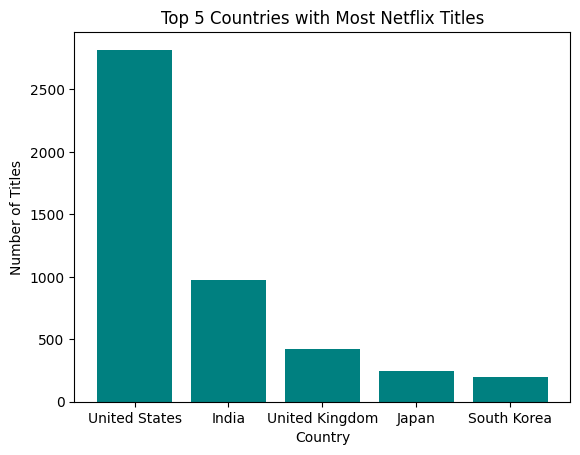

In [198]:
top_countries=df['country'].value_counts().head(5)
plt.bar(top_countries.index, top_countries.values, color='teal')
plt.title("Top 5 Countries with Most Netflix Titles")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.show()


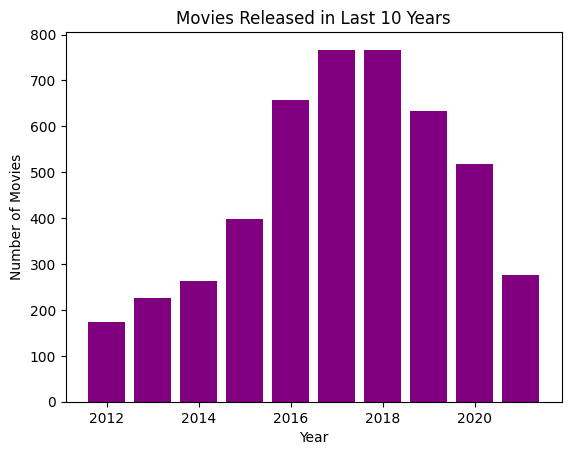

In [199]:
import datetime

last10 = df[df['type']=="Movie"]['release_year'].value_counts().sort_index()
last10 = last10[last10.index >= (df['release_year'].max()-9)]  # last 10 years

plt.bar(last10.index, last10.values, color='purple')
plt.title("Movies Released in Last 10 Years")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.show()


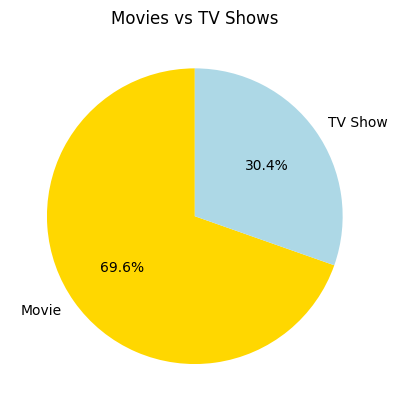

In [ ]:

type_counts = df['type'].value_counts()
plt.pie(type_counts.values, labels=type_counts.index,autopct='%1.1f%%', 
        colors=['gold','lightblue'], startangle=90)
plt.title("Movies vs TV Shows")
plt.show()


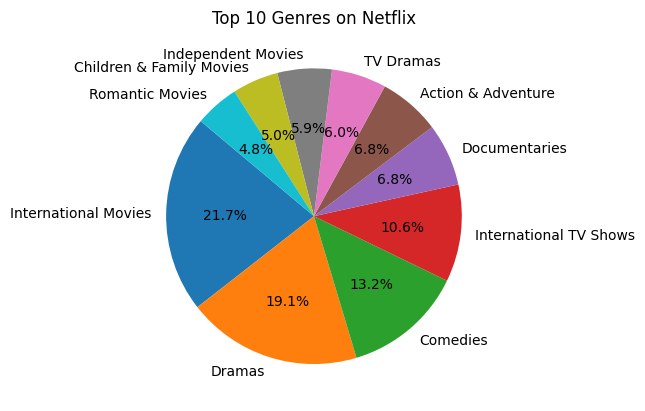

In [201]:
from collections import Counter

genres = df['listed_in'].dropna().str.split(', ')
genre_list = [g for sublist in genres for g in sublist]
top_genres = Counter(genre_list).most_common(10)

labels, values = zip(*top_genres)

plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Top 10 Genres on Netflix")
plt.show()


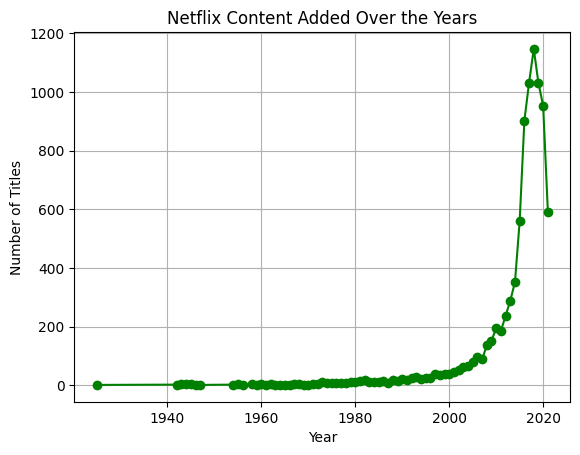

In [202]:
content_year = df['release_year'].value_counts().sort_index()

plt.plot(content_year.index, content_year.values, marker='o', color='green')
plt.title("Netflix Content Added Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()


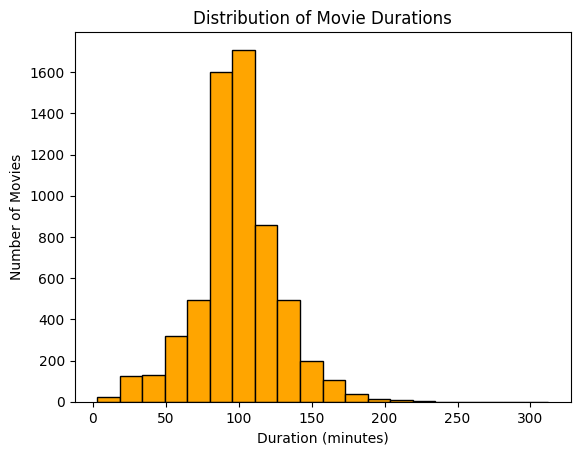

In [203]:
import numpy as np

movie_duration = df[df['type']=="Movie"]['duration'].dropna()
movie_duration = movie_duration.str.replace(" min","").astype(int)

plt.hist(movie_duration, bins=20, color='orange', edgecolor='black')
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of Movies")
plt.show()
